In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
#remove results
# Check if the file exists
file_path="/kaggle/working/results.csv"

if os.path.exists(file_path):
    # Remove the file
    os.remove(file_path)
    print(f"{file_path} has been removed.")
else:
    print(f"{file_path} does not exist.")



/kaggle/working/results.csv has been removed.


In [4]:
#remove training logs
import shutil

# Specify the path to the directory
directory_path = '/kaggle/working/Logs'

# Remove the directory and its contents
shutil.rmtree(directory_path)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/Logs'

In [5]:
epochs=150
batch_size=1024
window_length = 640  # For example, use a window length of 10
num_features=6
number_of_features=6
num_classes=2
patience=15
class_names3 = {
    0: 'Normal',
    1: 'Medium',
    2: 'High'
}
class_names2 = {
    0: 'Normal',
    1: 'High'
}

In [ ]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/merged_data.csv")
df

In [ ]:
# Assuming your DataFrame is df and the column is 'ID'
# Convert integer values to strings
df['id'] = df['id'].astype(str)
# Assuming df is your DataFrame
df['label'] = df['label'].replace(1, 0)

# Print the DataFrame to verify the conversion
print(df)


In [ ]:
df.iloc[:, :-1]

In [ ]:
testing_ids = ['7E', '8B','E4']
val_ids=['94','CE']

In [ ]:
#testing data
all_ids = set(df['id'])
exclude_ids = set(testing_ids + val_ids)
train_ids = list(all_ids - exclude_ids)

# Filter the DataFrame based on the specified ID values
Testing_data1 = df[df['id'].isin(testing_ids)]
val_data1 = df[df['id'].isin(val_ids)]
train_data1 = df[df['id'].isin(train_ids)]


del all_ids,val_ids,testing_ids,train_ids

In [ ]:
del df

In [ ]:
Testing_data1

In [ ]:
import numpy as np

def apply_sliding_windowing_new(df, window_length, num_features, overlap=0.3, ftrs=['X', 'Y', 'Z']):
    # Sort the values by 'id' and 'datetime' columns
    df_sorted = df.sort_values(by=['id', 'datetime'])

    # Initialize arrays to store reshaped data and labels
    reshaped_data = []
    labels = []

    # Set the initial start index
    start_idx = 0

    while start_idx + window_length <= len(df_sorted):
        # Set the end index for the current window
        end_idx = start_idx + window_length

        # Create a subset of the DataFrame for the current window
        subset_df = df_sorted.iloc[start_idx:end_idx]

        # Extract features from the subset DataFrame and convert to numpy array
        subset_features = subset_df[ftrs].values
        reshaped_data.append(subset_features)

        # Extract label for the current window and encode it
        label = subset_df['label'].iloc[0]  # Assuming the label is the same for all rows in the window
        labels.append(label)

        # Update the start index for the next window
        start_idx = end_idx - int(window_length * (1 - overlap))

    # Convert the list of arrays to a single numpy array
    reshaped_data = np.array(reshaped_data)

    # Encode labels
    labels_encoded = encode_labels(np.array(labels))

    return reshaped_data, labels_encoded

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def apply_minmax_scaling(df,features=['X', 'Y', 'Z']):
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Apply MinMaxScaler to 'x', 'y', 'z' columns
    df[features] = scaler.fit_transform(df[features])

    return df

# Example usage
# Assuming df is your DataFrame
# df_normalized = apply_minmax_scaling(df)


In [ ]:
features = ['X', 'Y', 'Z','EDA','HR','TEMP']
train_data1 = apply_minmax_scaling(train_data1,features=features)
Testing_data1 = apply_minmax_scaling(Testing_data1,features=features)
val_data1 = apply_minmax_scaling(val_data1,features=features)

In [ ]:
train_data1

In [ ]:
print("Processing x_Val1...")
x_val1, y_val1 = apply_sliding_windowing_new(val_data1,window_length, num_features,overlap=0.5,ftrs=features)

print("Processing x_test1...")
x_test1, y_test1 = apply_sliding_windowing_new(Testing_data1, window_length, num_features,overlap=0.5,ftrs=features)

print("Processing x_train1...")
x_train1, y_train1 = apply_sliding_windowing_new(train_data1, window_length, num_features,overlap=0.5,ftrs=features)

In [ ]:
print(x_train1.shape)  # Check the shape of the reshaped data
print(x_test1.shape)  # Check the shape of the reshaped data
print(x_val1.shape)  # Check the shape of the reshaped data
print(y_train1.shape)  # Check the shape of the reshaped data
print(y_test1.shape)  # Check the shape of the reshaped data
print(y_val1.shape)  # Check the shape of the reshaped data

In [ ]:
import os
import numpy as np

def save_numpy_to_directory(numpy_array, directory, file_name):
    # Create the directory if it doesn't exist
    os.makedirs(directory, exist_ok=True)
    
    # Save the NumPy array to the specified directory
    file_path = os.path.join(directory, file_name)
    np.save(file_path, numpy_array)

In [ ]:
directory_path="/kaggle/working"
file_name = "x_train.npy"
save_numpy_to_directory(x_train1, directory_path, file_name)

file_name = "y_train.npy"
save_numpy_to_directory(y_train1, directory_path, file_name)

file_name = "x_test.npy"
save_numpy_to_directory(x_test1, directory_path, file_name)

file_name = "y_test.npy"
save_numpy_to_directory(y_test1, directory_path, file_name)

file_name = "x_val.npy"
save_numpy_to_directory(x_val1, directory_path, file_name)

file_name = "y_val.npy"
save_numpy_to_directory(y_val1, directory_path, file_name)


In [6]:
import numpy as np

def load_numpy_from_file(file_path):
    # Load the NumPy array from the specified file path
    numpy_array = np.load(file_path)
    return numpy_array



In [7]:
# Example usage
file_path = "/kaggle/working/x_train.npy"
x_train = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/y_train.npy"
y_train = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/x_test.npy"
x_test = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/y_test.npy"
y_test = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/x_val.npy"
x_val = load_numpy_from_file(file_path)
# Example usage
file_path = "/kaggle/working/y_val.npy"
y_val = load_numpy_from_file(file_path)


In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Input, concatenate
from tensorflow.keras.utils import plot_model
from keras.metrics import Recall

def create_single_lstm_model(num_classes, window_length, number_of_features, lstm_units1=265, lstm_units2=128,dense_layers=3,dense_units=256,nn_dropout=0.2):
    # Initialize the model
    input_all = Input(shape=(window_length, number_of_features), name='input_data')

    branch1 = LSTM(lstm_units1,dropout=0.2, recurrent_dropout=0.2, return_sequences=True, name='lstm_layer_1')(input_all)
    branch1 = LSTM(lstm_units2,dropout=0.2, recurrent_dropout=0.2 ,name='lstm_layer_2')(branch1)
    branch1 = Flatten(name='flatten_sensor')(branch1)


    # Add a dense layer for the output
    for _ in range(dense_layers):
        branch1 = Dense(dense_units, activation="relu")(branch1)
        branch1 = Dropout(nn_dropout)(branch1)
        dense_units= int(dense_units/2)

    output_layer = Dense(num_classes, activation='softmax', name='output')(branch1)

    model = tf.keras.Model(inputs=input_all, outputs=output_layer, name='single_lstm_model')

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Recall()])

    return model

2024-05-06 11:54:09.205155: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 11:54:09.205254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 11:54:09.335514: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import plot_model

import tensorflow as tf
from keras.metrics import Recall
from keras.layers import LSTM, Dense, Dropout, Flatten, Input, concatenate
from tensorflow.keras.optimizers import Adam

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.2):
    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(rate=dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res
def create_single_model_with_attention_block(
    num_classes,
    window_length,
    number_of_features, 
    head_size=256,
    num_heads=4,
    ff_dim=256,
    num_transformer_blocks=4,
    dense_layers=3,
    lstm_units=256,
    dropout=0.2,
    mlp_dropout=0,
    lstm_dropout=0,
    dense_units=256
):
    # Define the model inside the strategy's scope
#     strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])  # Utilize two GPUs
#     with strategy.scope():

    input_all = Input(shape=(window_length, number_of_features), name='input_data')

    branch1=input_all
    for _ in range(num_transformer_blocks):
        branch1 = transformer_encoder(branch1, head_size, num_heads, ff_dim, dropout)

    branch1 = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(branch1)


    for _ in range(dense_layers):
        branch1 = Dense(dense_units, activation="relu")(branch1)
        branch1 = Dropout(dropout)(branch1)
        dense_units= int(dense_units/2)

    output_layer = Dense(num_classes, activation='softmax', name='output')(branch1)
        
    model = tf.keras.Model(inputs=input_all, outputs=output_layer, name='single_multiheaded_model')

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[Recall()])

    return model

In [10]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import tensorflow as tf

from tensorflow.keras import layers
import numpy as np

randomSeed = 1
# tf.random.set_seed(randomSeed)

class DropPath(layers.Layer):
    def __init__(self, drop_prob=0.0, **kwargs):
        super(DropPath, self).__init__(**kwargs)
        self.drop_prob = drop_prob

    def call(self, x,training=None):
        if(training):
            input_shape = tf.shape(x)
            batch_size = input_shape[0]
            rank = x.shape.rank
            shape = (batch_size,) + (1,) * (rank - 1)
            random_tensor = (1 - self.drop_prob) + tf.random.uniform(shape, dtype=x.dtype)
            path_mask = tf.floor(random_tensor)
            output = tf.math.divide(x, 1 - self.drop_prob) * path_mask
            return output
        else:
            return x 

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'drop_prob': self.drop_prob,})
        return config

class GatedLinearUnit(layers.Layer):
    def __init__(self,units,**kwargs):
        super(GatedLinearUnit, self).__init__(**kwargs)
        self.units = units
        self.linear = layers.Dense(units * 2)
        self.sigmoid = tf.keras.activations.sigmoid
    def call(self, inputs):
        linearProjection = self.linear(inputs)
        softMaxProjection = self.sigmoid(linearProjection[:,:,self.units:])
        return tf.multiply(linearProjection[:,:,:self.units],softMaxProjection)
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'units': self.units,})
        return config

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim,**kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = patch + self.position_embedding(positions)
        return encoded
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_patches': self.num_patches,
            'projection_dim': self.projection_dim,})
        return config

class ClassToken(layers.Layer):
    def __init__(self, hidden_size,**kwargs):
        super(ClassToken, self).__init__(**kwargs)
        self.cls_init = tf.random.normal
        self.hidden_size = hidden_size
        self.cls = tf.Variable(
            name="cls",
            initial_value=self.cls_init(shape=(1, 1, self.hidden_size), seed=randomSeed, dtype="float32"),
            trainable=True,
        )

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        cls_broadcasted = tf.cast(
            tf.broadcast_to(self.cls, [batch_size, 1, self.hidden_size]),
            dtype=inputs.dtype,
        )
        return tf.concat([cls_broadcasted, inputs], 1)
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'hidden_size': self.hidden_size,})
        return config

class Prompts(layers.Layer):
    def __init__(self, projectionDims,promptCount = 1,**kwargs):
        super(Prompts, self).__init__(**kwargs)
        self.cls_init = tf.random.normal
        self.projectionDims = projectionDims
        self.promptCount = promptCount
        self.prompts = [tf.Variable(
            name="prompt"+str(_),
            initial_value=self.cls_init(shape=(1, 1, self.projectionDims), seed=randomSeed, dtype="float32"),
            trainable=True,
        )  for _ in range(promptCount)]

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        prompt_broadcasted = tf.concat([tf.cast(tf.broadcast_to(promptInits, [batch_size, 1, self.projectionDims]),dtype=inputs.dtype,)for promptInits in self.prompts],1)
        return tf.concat([inputs,prompt_broadcasted], 1)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'projectionDims': self.projectionDims,
            'promptCount': self.promptCount,})
        return config
    
class SensorWiseMHA(layers.Layer):
    def __init__(self, projectionQuarter, num_heads,startIndex,stopIndex,dropout_rate = 0.0,dropPathRate = 0.0, **kwargs):
        super(SensorWiseMHA, self).__init__(**kwargs)
        self.projectionQuarter = projectionQuarter
        self.num_heads = num_heads
        self.dropout_rate = dropout_rate
        self.MHA = layers.MultiHeadAttention(num_heads=self.num_heads, key_dim=self.projectionQuarter, dropout = dropout_rate )
        self.startIndex = startIndex
        self.stopIndex = stopIndex
        self.dropPathRate = dropPathRate
        self.DropPath = DropPath(dropPathRate)
    def call(self, inputData, training=None, return_attention_scores = False):
        extractedInput = inputData[:,:,self.startIndex:self.stopIndex]
        if(return_attention_scores):
            MHA_Outputs, attentionScores = self.MHA(extractedInput,extractedInput,return_attention_scores = True )
            return MHA_Outputs , attentionScores
        else:
            MHA_Outputs = self.MHA(extractedInput,extractedInput)
            MHA_Outputs = self.DropPath(MHA_Outputs)
            return MHA_Outputs
        
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'projectionQuarter': self.projectionQuarter,
            'num_heads': self.num_heads,
            'startIndex': self.startIndex,
            'dropout_rate': self.dropout_rate,
            'stopIndex': self.stopIndex,
            'dropPathRate': self.dropPathRate,})
        return config
def softDepthConv(inputs):
    kernel = inputs[0]
    inputData = inputs[1]
    convOutputs = tf.nn.conv1d(
    inputData,
    kernel,
    stride = 1,
    padding = 'SAME',
    data_format='NCW',)
    return convOutputs




class liteFormer(layers.Layer):
    def __init__(self,startIndex,stopIndex, projectionSize, kernelSize = 16, attentionHead = 3, use_bias=False, dropPathRate = 0.0,dropout_rate = 0,**kwargs):
        super(liteFormer, self).__init__(**kwargs)
        self.use_bias = use_bias
        self.startIndex = startIndex
        self.stopIndex = stopIndex
        self.kernelSize = kernelSize
        self.softmax = tf.nn.softmax
        self.projectionSize = projectionSize
        self.attentionHead = attentionHead 
        self.DropPathLayer = DropPath(dropPathRate)
        self.projectionHalf = projectionSize // 2
    def build(self,inputShape):
        self.depthwise_kernel = [self.add_weight(
            shape=(self.kernelSize,1,1),
            initializer="glorot_uniform",
            trainable=True,
            name="convWeights"+str(_),
            dtype="float32") for _ in range(self.attentionHead)]
        if self.use_bias:
            self.convBias = self.add_weight(
                shape=(self.attentionHead,), 
                initializer="glorot_uniform", 
                trainable=True,  
                name="biasWeights",
                dtype="float32"
            )
        
    def call(self, inputs,training=None):
        formattedInputs = inputs[:,:,self.startIndex:self.stopIndex]
        inputShape = tf.shape(formattedInputs)
        reshapedInputs = tf.reshape(formattedInputs,(-1,self.attentionHead,inputShape[1]))
        if(training):
            for convIndex in range(self.attentionHead):
                self.depthwise_kernel[convIndex].assign(self.softmax(self.depthwise_kernel[convIndex], axis=0))
        convOutputs = tf.convert_to_tensor([tf.nn.conv1d(
            reshapedInputs[:,convIndex:convIndex+1,:],
            self.depthwise_kernel[convIndex],
            stride = 1,
            padding = 'SAME',
            data_format='NCW',) for convIndex in range(self.attentionHead) ])
        convOutputsDropPath = self.DropPathLayer(convOutputs)
        localAttention = tf.reshape(convOutputsDropPath,(-1,inputShape[1],self.projectionSize))
        return localAttention
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'use_bias': self.use_bias,
            'kernelSize': self.kernelSize,
            'startIndex': self.startIndex,
            'stopIndex': self.stopIndex,
            'projectionSize': self.projectionSize,
            'attentionHead': self.attentionHead,})
        return config          

class mixAccGyro(layers.Layer):
    def __init__(self,projectionQuarter,projectionHalf,projection_dim,**kwargs):
        super(mixAccGyro, self).__init__(**kwargs)
        self.projectionQuarter = projectionQuarter
        self.projectionHalf = projectionHalf
        self.projection_dim = projection_dim
        self.projectionThreeFourth = self.projectionHalf+self.projectionQuarter
        self.mixedAccGyroIndex = tf.reshape(tf.transpose(tf.stack(
            [np.arange(projectionQuarter,projectionHalf), np.arange(projectionHalf,projectionHalf + projectionQuarter)])),[-1])
        self.newArrangement = tf.concat((np.arange(0,projectionQuarter),self.mixedAccGyroIndex,np.arange(self.projectionThreeFourth,projection_dim)),axis = 0)
    def call(self, inputs):
        return tf.gather(inputs,self.newArrangement,axis= 2)
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'projectionQuarter': self.projectionQuarter,
            'projectionHalf': self.projectionHalf,
            'projection_dim': self.projection_dim,
        })
        return config

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.swish)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

def mlp2(x, hidden_units, dropout_rate):
    x = layers.Dense(hidden_units[0],activation=tf.nn.swish)(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(hidden_units[1])(x)
    return x

def depthMLP(x, hidden_units, dropout_rate):
    x = layers.Dense(hidden_units[0])(x)
    x = layers.DepthwiseConv1D(3,data_format='channels_first',activation=tf.nn.swish)(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(hidden_units[1])(x)
    x = layers.Dropout(dropout_rate)(x)
    return x

class SensorPatchesTimeDistributed(layers.Layer):
    def __init__(self, projection_dim,filterCount,patchCount,frameSize = 128, channelsCount = 6,**kwargs):
        super(SensorPatchesTimeDistributed, self).__init__(**kwargs)
        self.projection_dim = projection_dim
        self.frameSize = frameSize
        self.channelsCount = channelsCount
        self.patchCount = patchCount
        self.filterCount = filterCount
        self.reshapeInputs = layers.Reshape((patchCount, frameSize // patchCount, channelsCount))
        self.kernelSize = (projection_dim//2 + filterCount) // filterCount
        self.accProjection = layers.TimeDistributed(layers.Conv1D(filters = filterCount,kernel_size = self.kernelSize,strides = 1, data_format = "channels_last"))
        self.gyroProjection = layers.TimeDistributed(layers.Conv1D(filters = filterCount,kernel_size = self.kernelSize,strides = 1, data_format = "channels_last"))
        self.flattenTime = layers.TimeDistributed(layers.Flatten())
        assert (projection_dim//2 + filterCount) / filterCount % self.kernelSize == 0
        print("Kernel Size is "+str((projection_dim//2 + filterCount) / filterCount))
#         assert 
    def call(self, inputData):
        inputData = self.reshapeInputs(inputData)
        accProjections = self.flattenTime(self.accProjection(inputData[:,:,:,:3]))
        gyroProjections = self.flattenTime(self.gyroProjection(inputData[:,:,:,3:]))
        Projections = tf.concat((accProjections,gyroProjections),axis=2)
        return Projections
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'projection_dim': self.projection_dim,
            'filterCount': self.filterCount,
            'patchCount': self.patchCount,
            'frameSize': self.frameSize,
            'channelsCount': self.channelsCount,})
        return config
    
class SensorPatches(layers.Layer):
    def __init__(self, projection_dim, patchSize,timeStep, **kwargs):
        super(SensorPatches, self).__init__(**kwargs)
        self.patchSize = patchSize
        self.timeStep = timeStep
        self.projection_dim = projection_dim
        self.accProjection = layers.Conv1D(filters = int(projection_dim/2),kernel_size = patchSize,strides = timeStep, data_format = "channels_last")
        self.gyroProjection = layers.Conv1D(filters = int(projection_dim/2),kernel_size = patchSize,strides = timeStep, data_format = "channels_last")
    def call(self, inputData):

        accProjections = self.accProjection(inputData[:,:,:3])
        gyroProjections = self.gyroProjection(inputData[:,:,3:])
        Projections = tf.concat((accProjections,gyroProjections),axis=2)
        return Projections
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'patchSize': self.patchSize,
            'projection_dim': self.projection_dim,
            'timeStep': self.timeStep,})
        return config


class threeSensorPatches(layers.Layer):
    def __init__(self, projection_dim, patchSize,timeStep, **kwargs):
        super(threeSensorPatches, self).__init__(**kwargs)
        self.patchSize = patchSize
        self.timeStep = timeStep
        self.projection_dim = projection_dim
        self.accProjection = layers.Conv1D(filters = int(projection_dim//3),kernel_size = patchSize,strides = timeStep, data_format = "channels_last")
        self.gyroProjection = layers.Conv1D(filters = int(projection_dim//3),kernel_size = patchSize,strides = timeStep, data_format = "channels_last")
        self.magProjection = layers.Conv1D(filters = int(projection_dim//3),kernel_size = patchSize,strides = timeStep, data_format = "channels_last")

    def call(self, inputData):

        accProjections = self.accProjection(inputData[:,:,:3])
        gyroProjections = self.gyroProjection(inputData[:,:,3:6])
        magProjections = self.magProjection(inputData[:,:,6:])

        Projections = tf.concat((accProjections,gyroProjections,magProjections),axis=2)
        return Projections
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'patchSize': self.patchSize,
            'projection_dim': self.projection_dim,
            'timeStep': self.timeStep,})
        return config

        
class fourSensorPatches(layers.Layer):
    def __init__(self, projection_dim, patchSize,timeStep, **kwargs):
        super(fourSensorPatches, self).__init__(**kwargs)
        self.patchSize = patchSize
        self.timeStep = timeStep
        self.projection_dim = projection_dim
        self.accProjection = layers.Conv1D(filters = int(projection_dim/4),kernel_size = patchSize,strides = timeStep, data_format = "channels_last")
        self.gyroProjection = layers.Conv1D(filters = int(projection_dim/4),kernel_size = patchSize,strides = timeStep, data_format = "channels_last")
        self.magProjection = layers.Conv1D(filters = int(projection_dim/4),kernel_size = patchSize,strides = timeStep, data_format = "channels_last")
        self.altProjection = layers.Conv1D(filters = int(projection_dim/4),kernel_size = patchSize,strides = timeStep, data_format = "channels_last")

    def call(self, inputData):

        accProjections = self.accProjection(inputData[:,:,:3])
        gyroProjections = self.gyroProjection(inputData[:,:,3:6])
        magProjection = self.magProjection(inputData[:,:,6:9])
        altProjection = self.altProjection(inputData[:,:,9:])

        Projections = tf.concat((accProjections,gyroProjections,magProjection,altProjection),axis=2)
        return Projections
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'patchSize': self.patchSize,
            'projection_dim': self.projection_dim,
            'timeStep': self.timeStep,})
        return config

def extract_intermediate_model_from_base_model(base_model, intermediate_layer=4):
    model = tf.keras.Model(inputs=base_model.inputs, outputs=base_model.layers[intermediate_layer].output, name=base_model.name + "_layer_" + str(intermediate_layer))
    return model

def HART(input_shape,activityCount, projection_dim = 192,patchSize = 16,timeStep = 16,num_heads = 3,filterAttentionHead = 4, convKernels = [3, 7, 15, 31, 31, 31], mlp_head_units = [1024],dropout_rate = 0.3,useTokens = False):
    projectionHalf = projection_dim//2
    projectionQuarter = projection_dim//4
    dropPathRate = np.linspace(0, dropout_rate* 10, len(convKernels)) * 0.1
    transformer_units = [
    projection_dim * 2,
    projection_dim,]  
    inputs = layers.Input(shape=input_shape)
    patches = SensorPatches(projection_dim,patchSize,timeStep)(inputs)
    if(useTokens):
        patches = ClassToken(projection_dim)(patches)
    patchCount = patches.shape[1] 
    encoded_patches = PatchEncoder(patchCount, projection_dim)(patches)
    # Create multiple layers of the Transformer block.
    for layerIndex, kernelLength in enumerate(convKernels):        
        x1 = layers.LayerNormalization(epsilon=1e-6 , name = "normalizedInputs_"+str(layerIndex))(encoded_patches)
        branch1 = liteFormer(
                          startIndex = projectionQuarter,
                          stopIndex = projectionQuarter + projectionHalf,
                          projectionSize = projectionHalf,
                          attentionHead =  filterAttentionHead, 
                          kernelSize = kernelLength,
                          dropPathRate = dropPathRate[layerIndex],
                          dropout_rate = dropout_rate,
                          name = "liteFormer_"+str(layerIndex))(x1)

                          
        branch2Acc = SensorWiseMHA(projectionQuarter,num_heads,0,projectionQuarter,dropPathRate = dropPathRate[layerIndex],dropout_rate = dropout_rate,name = "AccMHA_"+str(layerIndex))(x1)

        branch2Gyro = SensorWiseMHA(projectionQuarter,num_heads,projectionQuarter + projectionHalf ,projection_dim,dropPathRate = dropPathRate[layerIndex],dropout_rate = dropout_rate, name = "GyroMHA_"+str(layerIndex))(x1)
        
        concatAttention = Concatenate()([branch2Acc,branch1,branch2Gyro])
        #concatAttention = tf.concat((branch2Acc,branch1,branch2Gyro),axis= 2 )
        x2 = layers.Add()([concatAttention, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp2(x3, hidden_units=transformer_units, dropout_rate=dropout_rate)
        x3 = DropPath(dropPathRate[layerIndex])(x3)
        encoded_patches = layers.Add()([x3, x2])
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    if(useTokens):
        representation = layers.Lambda(lambda v: v[:, 0], name="ExtractToken")(representation)
    else:
        representation = layers.GlobalAveragePooling1D()(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=dropout_rate)
    logits = layers.Dense(activityCount,  activation='softmax')(features)
    model = tf.keras.Model(inputs=inputs, outputs=logits)
    return model
# ------------------------------specific module for MobileHART------------------------------

def conv_block(x, filters=16, kernel_size=3, strides=2):
    conv_layer = layers.Conv1D(
        filters, kernel_size, strides=strides, activation=tf.nn.swish, padding="same"
    )
    return conv_layer(x)

def inverted_residual_block(x, expanded_channels, output_channels, strides=1):
    m = layers.Conv1D(expanded_channels, 1, padding="same", use_bias=False)(x)
    m = layers.BatchNormalization()(m)
    m = tf.nn.swish(m)

    if strides == 2:
        m = layers.ZeroPadding1D(padding=1)(m)
    m = layers.DepthwiseConv1D(
        3, strides=strides, padding="same" if strides == 1 else "valid", use_bias=False
    )(m)
    m = layers.BatchNormalization()(m)
    m = tf.nn.swish(m)

    m = layers.Conv1D(output_channels, 1, padding="same", use_bias=False)(m)
    m = layers.BatchNormalization()(m)
    
    if tf.math.equal(x.shape[-1], output_channels) and strides == 1:
        return layers.Add()([m, x])
    return m

def transformer_block(x, transformer_layers, projection_dim, dropout_rate = 0.3,num_heads=2):
    
    dropPathRate = np.linspace(0, dropout_rate* 10,transformer_layers) * 0.1

    
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=dropout_rate
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, x])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp2(
            x3,
            hidden_units=[x.shape[-1] * 2, x.shape[-1]],
            dropout_rate=dropout_rate,
        )
        # Skip connection 2.
        x = layers.Add()([x3, x2])

    return x

def mobilevit_block(x, num_blocks, projection_dim, strides=1):
    # Local projection with convolutions.
    local_features = conv_block(x, filters=projection_dim, strides=strides)
    local_features = conv_block(
        local_features, filters=projection_dim, kernel_size=1, strides=strides
    )
    global_features = transformer_block(
        local_features, num_blocks, projection_dim
    )
    
    # Apply point-wise conv -> concatenate with the input features.
    folded_feature_map = conv_block(
        global_features, filters=x.shape[-1], kernel_size=1, strides=strides
    )
    local_global_features = layers.Concatenate(axis=-1)([x, folded_feature_map])

    # Fuse the local and global features using a convoluion layer.
    local_global_features = conv_block(
        local_global_features, filters=projection_dim, strides=strides
    )

    return local_global_features


def sensorWiseTransformer_block(xAcc, xGyro, patchCount,transformer_layers, projection_dim,kernelSize = 4,  dropout_rate = 0.3,num_heads=2):
    projectionQuarter = projection_dim // 4
    projectionHalf = projection_dim // 2
    dropPathRate = np.linspace(0, dropout_rate* 10,transformer_layers) * 0.1

    x = tf.concat((xAcc,xGyro),axis= 2 )
    for layerIndex in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6, name = "normalizedInputs_"+str(layerIndex))(x)

        branch1 = liteFormer(
                            startIndex = projectionQuarter,
                            stopIndex = projectionQuarter + projectionHalf,
                            projectionSize = projectionHalf,
                            attentionHead =  num_heads, 
                            kernelSize = kernelSize,
                            dropPathRate = dropPathRate[layerIndex],
                            name = "liteFormer_"+str(layerIndex))(x1)

        branch2Acc = SensorWiseMHA(projectionQuarter,num_heads,0,projectionQuarter,dropPathRate = dropPathRate[layerIndex],dropout_rate = dropout_rate,name = "AccMHA_"+str(layerIndex))(x1)
        branch2Gyro = SensorWiseMHA(projectionQuarter,num_heads,projectionQuarter + projectionHalf ,projection_dim,dropPathRate = dropPathRate[layerIndex],dropout_rate = dropout_rate,name = "GyroMHA_"+str(layerIndex))(x1)
        concatAttention = tf.concat((branch2Acc,branch1,branch2Gyro),axis= 2 )
        # Skip connection 1.
        x2 = layers.Add()([concatAttention, x])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp2(
            x3,
            hidden_units=[x.shape[-1] * 2, x.shape[-1]],
            dropout_rate=dropout_rate,
        )
        x3 = DropPath(dropPathRate[layerIndex])(x3)
        # Skip connection 2.
        x = layers.Add()([x3, x2])

    return x
def sensorWiseHART(xAcc,xGyro, num_blocks, projection_dim, kernelSize = 4, strides=1):
    # Local projection with convolutions.
#     ---------------acc--------------
    local_featuresAcc = conv_block(xAcc, filters=projection_dim//2, strides=strides)
    local_featuresAcc = conv_block(
        local_featuresAcc, filters=projection_dim//2, kernel_size=1, strides=strides
    )

#     ---------------gyro--------------

    local_featuresGyro = conv_block(xGyro, filters=projection_dim//2, strides=strides)
    local_featuresGyro = conv_block(
        local_featuresGyro, filters=projection_dim//2, kernel_size=1, strides=strides
    )
    global_features = sensorWiseTransformer_block(local_featuresAcc,
        local_featuresGyro, local_featuresGyro.shape[1], num_blocks, projection_dim, kernelSize = kernelSize
    )

    folded_feature_map_acc = conv_block(
        global_features[:,:,:projection_dim//2], filters=xAcc.shape[-1], kernel_size=1, strides=strides
    )
    local_global_features_acc = layers.Concatenate(axis=-1)([xAcc, folded_feature_map_acc])
        # Fuse the local and global features using a convoluion layer.
    local_global_features_acc = conv_block(
        local_global_features_acc, filters=projection_dim//2, strides=strides
    )
    
    folded_feature_map_gyro = conv_block(
        global_features[:,:,projection_dim//2:], filters=xGyro.shape[-1], kernel_size=1, strides=strides
    )
    local_global_features_gyro = layers.Concatenate(axis=-1)([xGyro, folded_feature_map_gyro])

    local_global_features_gyro = conv_block(
        local_global_features_gyro, filters=projection_dim//2, strides=strides
    )

    return local_global_features_acc, local_global_features_gyro
def mv2Block(x,expansion_factor,filterCount):
    x = inverted_residual_block(
        x, expanded_channels=filterCount[0] * expansion_factor, output_channels=filterCount[1]
    )
    # Downsampling with MV2 block.
    x = inverted_residual_block(
        x, expanded_channels=filterCount[1] * expansion_factor, output_channels=filterCount[2], strides=2
    )
    x = inverted_residual_block(
        x, expanded_channels=filterCount[2] * expansion_factor, output_channels=filterCount[2]
    )
    x = inverted_residual_block(
        x, expanded_channels=filterCount[2] * expansion_factor, output_channels=filterCount[2]
    )
    # First MV2 -> MobileViT block.
    x = inverted_residual_block(
        x, expanded_channels=filterCount[2] * expansion_factor, output_channels=filterCount[3], strides=2
    )
    return x
    # def hartModel(input_shape,activityCount, projection_dim,patchSize,timeStep,num_heads,filterAttentionHead, convKernels = [3, 7, 15, 31, 31, 31], mlp_head_units = [1024],dropout_rate = 0.3,useTokens = True):

def mobileHART_XS(input_shape,activityCount,projectionDims = [96,120,144],filterCount = [16//2,32//2,48//2,64//2,80,96,384],expansion_factor=4,mlp_head_units = [1024],dropout_rate = 0.3):
    
    # inputs = keras.Input((segment_size, num_input_channels))
    inputs = layers.Input(shape=input_shape)

    # Initial conv-stem -> MV2 block.
    accX = conv_block(inputs[:,:,:3],filters=filterCount[0])
    gyroX = conv_block(inputs[:,:,3:],filters=filterCount[0])
    accX = mv2Block(accX,expansion_factor,filterCount)
    gyroX = mv2Block(gyroX,expansion_factor,filterCount)
    accX, gyroX  = sensorWiseHART(accX,gyroX, num_blocks=2, projection_dim=projectionDims[0])
    x = tf.concat((accX,gyroX), axis = 2)
    x = layers.Dense(projectionDims[0],activation=tf.nn.swish)(x)
    x = layers.Dropout(dropout_rate)(x)

    # Second MV2 -> MobileViT block.
    x = inverted_residual_block(
        x, expanded_channels=projectionDims[0] * expansion_factor, output_channels=filterCount[4], strides=2
    )
    x = mobilevit_block(x, num_blocks=4, projection_dim=projectionDims[1])

    # Third MV2 -> MobileViT block.
    x = inverted_residual_block(
        x, expanded_channels=projectionDims[1] * expansion_factor, output_channels=filterCount[5], strides=2
    )
    x = mobilevit_block(x, num_blocks=3, projection_dim=projectionDims[2])
    x = conv_block(x, filters=filterCount[6], kernel_size=1, strides=1)
    # Classification head.
    x = layers.GlobalAvgPool1D(name = "GAP")(x)
    
    x = mlp(x, hidden_units=mlp_head_units, dropout_rate=dropout_rate)

    outputs = layers.Dense(activityCount, activation="softmax")(x)
# f.keras.Model(inputs=inputs, outputs=logits)
    return tf.keras.Model(inputs, outputs)

def mobileHART_XXS(input_shape,activityCount,projectionDims = [64,80,96],filterCount = [16//2,16//2,24//2,48//2,64,80,320],expansion_factor=2,mlp_head_units = [1024],dropout_rate = 0.3):
    
    # inputs = keras.Input((segment_size, num_input_channels))
    inputs = layers.Input(shape=input_shape)

    # Initial conv-stem -> MV2 block.
    accX = conv_block(inputs[:,:,:3],filters=filterCount[0])
    gyroX = conv_block(inputs[:,:,3:],filters=filterCount[0])
    accX = mv2Block(accX,expansion_factor,filterCount)
    gyroX = mv2Block(gyroX,expansion_factor,filterCount)
    accX, gyroX  = sensorWiseHART(accX,gyroX, num_blocks=2, projection_dim=projectionDims[0])
    x = tf.concat((accX,gyroX), axis = 2)
    x = layers.Dense(projectionDims[0],activation=tf.nn.swish)(x)
    x = layers.Dropout(dropout_rate)(x)

    # Second MV2 -> MobileViT block.
    x = inverted_residual_block(
        x, expanded_channels=projectionDims[0] * expansion_factor, output_channels=filterCount[4], strides=2
    )
    x = mobilevit_block(x, num_blocks=4, projection_dim=projectionDims[1])

    # Third MV2 -> MobileViT block.
    x = inverted_residual_block(
        x, expanded_channels=projectionDims[1] * expansion_factor, output_channels=filterCount[5], strides=2
    )
    x = mobilevit_block(x, num_blocks=3, projection_dim=projectionDims[2])
    x = conv_block(x, filters=filterCount[6], kernel_size=1, strides=1)
    # Classification head.
    x = layers.GlobalAvgPool1D(name = "GAP")(x)
    
    x = mlp(x, hidden_units=mlp_head_units, dropout_rate=dropout_rate)

    outputs = layers.Dense(activityCount, activation="softmax")(x)
# f.keras.Model(inputs=inputs, outputs=logits)
    return tf.keras.Model(inputs, outputs)


In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, CSVLogger
import os
def addCallbacks(model_name):
    cllbks = []
    # Define the callback
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',  # You can use 'val_accuracy' or other metrics
        factor=0.1,           # Factor by which the learning rate will be reduced. new_lr = lr * factor
        patience=5,           # Number of epochs with no improvement after which learning rate will be reduced
        min_lr=1e-6,          # Lower bound on the learning rate
        verbose=1
    )
    cllbks.append(reduce_lr)
    # Define the EarlyStopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Metric to monitor (e.g., validation loss)
        patience=patience,   # Number of epochs with no improvement before stopping
        verbose=1,           # Verbosity level (1 for updates, 0 for silent)
        restore_best_weights=True  # Restore model weights to the best observed during training
    )
    cllbks.append(early_stopping)
    log_dir = "Logs/" + model_name
    if not os.path.exists(log_dir):
        os.makedirs(log_dir)
    csv_logger_callback = CSVLogger(log_dir + '/logs.csv')
    cllbks.append(csv_logger_callback)
    # log_dir = save_folder + "Logs/" + model_name
    # tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    # # cllbks.append(tensorboard_callback)
    return cllbks
# callbacks=addCallbacks()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

def testModel(mdl, X_test1, y_test):
    # Predictions from the model
    y_pred = mdl.predict(X_test1)

    # Convert predictions to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
#     auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

    report = classification_report(y_test_labels, y_pred_labels)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print(report)
#     print("AUC:", auc)
    print("Confusion Matrix:\n", conf_matrix)

    return conf_matrix, accuracy, precision, recall, f1,y_pred

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(confusion_matrix, class_names=None, save_path=None):
    """
    Plot a confusion matrix as a heatmap.

    Parameters:
    - confusion_matrix (numpy.ndarray): Confusion matrix.
    - class_names (dict): Dictionary mapping class numbers to class names.
    - save_path (str): Path to save the heatmap plot. If None, the plot is displayed but not saved.

    Returns:
    - None
    """
    plt.figure(figsize=(8, 6))

    # Using Seaborn heatmap
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[class_names[i] for i in range(confusion_matrix.shape[0])] if class_names else None,
                yticklabels=[class_names[i] for i in range(confusion_matrix.shape[1])] if class_names else None)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    if save_path is not None:
        plt.savefig(save_path)
    else:
        plt.show()

# Example usage:
# Assuming you have a confusion matrix named 'conf_matrix'
# and a class_names dictionary mapping class numbers to class names
# and you want to save the heatmap to a file named 'confusion_matrix_heatmap.png'
# plot_confusion_matrix(conf_matrix, class_names=class_names, save_path='confusion_matrix_heatmap_extracted.png')


In [14]:
import pandas as pd

def append_to_csv(file_path, model_name, accuracy, precision, recall, f1_score):
    """
    Append a row with evaluation metrics to an existing CSV file.

    Parameters:
    - file_path: The path to the CSV file.
    - model_name: Name of the model.
    - accuracy: Accuracy value.
    - precision: Precision value.
    - recall: Recall value.
    - f1_score: F1 score value.
    - testing_time: Time taken for testing in seconds.
    - training_time: Time taken for training in seconds.
    """

    headers = ['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-Score']

    # Check if the file exists
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        # If the file doesn't exist, create a new one with headers
        df = pd.DataFrame(columns=headers)

    # Append a new row with the specified values
    new_row = pd.DataFrame([[model_name, accuracy, precision, recall, f1_score]], columns=headers)
    df = pd.concat([df, new_row], ignore_index=True)

    # Save to the same CSV file
    df.to_csv(file_path, index=False)

    print(f"Row appended to '{file_path}' successfully.")

# Example usage:
# csv_file_path = "evaluation_metrics.csv"
# append_to_csv(csv_file_path, "ExampleModel", 0.85, 0.88, 0.82, 0.85, 30, 120)


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

def evaluate_predictions_ensemble(voting_predictions, X_test, y_test):    
    # Get the class label with the highest average probability for each sample
#     voting_predictions = np.argmax(combined_probs, axis=1)

    # Convert true labels to class labels
    y_test_labels = np.argmax(y_test, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test_labels, voting_predictions)
    precision = precision_score(y_test_labels, voting_predictions, average='weighted')
    recall = recall_score(y_test_labels, voting_predictions, average='weighted')
    f1 = f1_score(y_test_labels, voting_predictions, average='weighted')

    # Classification report
    report = classification_report(y_test_labels, voting_predictions)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_labels, voting_predictions)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print(report)
    print("Confusion Matrix:\n", conf_matrix)

    return conf_matrix, accuracy, precision, recall, f1

# Example usage
# predictions_list = [y_pred_model1, y_pred_model2, y_pred_model3]
# conf_matrix, accuracy, precision, recall, f1 = evaluate_predictions(predictions_list, X_test, y_test)


In [45]:
import numpy as np

def soft_voting(m1_predictions, m2_predictions, m3_predictions):
    # Sum the predicted probabilities for each class across all models
    sum_probs = m1_predictions + m2_predictions + m3_predictions

    # Get the class with the highest sum of probabilities for each sample
    soft_voting_predictions = np.argmax(sum_probs, axis=1)

    return soft_voting_predictions

# Example usage
# m1_predictions = np.array([[0.2, 0.8], [0.7, 0.3], [0.4, 0.6]])
# m2_predictions = np.array([[0.5, 0.5], [0.3, 0.7], [0.8, 0.2]])
# m3_predictions = np.array([[0.1, 0.9], [0.6, 0.4], [0.9, 0.1]])

# soft_voting_predictions = soft_voting(m1_predictions, m2_predictions, m3_predictions)
# print("Soft Voting Predictions:", soft_voting_predictions)


In [48]:
def hard_voting(m1_predictions, m2_predictions, m3_predictions):
    final_predictions = []
    for m1, m2, m3 in zip(m1_predictions, m2_predictions, m3_predictions):
        # Convert predicted probabilities to class labels
        m1_label = np.argmax(m1)
        m2_label = np.argmax(m2)
        m3_label = np.argmax(m3)
        # Count the votes for each class
        votes = [0, 0]
        votes[m1_label] += 1
        votes[m2_label] += 1
        votes[m3_label] += 1
        # Select the class with the most votes
        final_predictions.append(np.argmax(votes))
    return final_predictions

# Example usage
# m1_predictions = np.array([[0.2, 0.8], [0.7, 0.3], [0.4, 0.6]])
# m2_predictions = np.array([[0.5, 0.5], [0.3, 0.7], [0.8, 0.2]])
# m3_predictions = np.array([[0.1, 0.9], [0.6, 0.4], [0.9, 0.1]])

# final_predictions = hard_voting(m1_predictions, m2_predictions, m3_predictions)
# print("Final Predictions (Hard Voting):", final_predictions)


In [18]:
def weighted_voting(m1_predictions, m2_predictions, m3_predictions, weights):
    final_predictions = []
    for m1, m2, m3 in zip(m1_predictions, m2_predictions, m3_predictions):
        # Calculate the weighted average of predictions
        weighted_avg = (m1 * weights[0] + m2 * weights[1] + m3 * weights[2]) / sum(weights)
        # Select the class with the highest weighted average
        final_predictions.append(np.argmax(weighted_avg))
    return final_predictions

# Example usage
# m1_predictions = np.array([[0.2, 0.8], [0.7, 0.3], [0.4, 0.6]])
# m2_predictions = np.array([[0.5, 0.5], [0.3, 0.7], [0.8, 0.2]])
# m3_predictions = np.array([[0.1, 0.9], [0.6, 0.4], [0.9, 0.1]])
# weights = [0.2, 0.3, 0.5]

# final_predictions = weighted_voting(m1_predictions, m2_predictions, m3_predictions, weights)
# print("Final Predictions (Weighted Voting):", final_predictions)


# Model LSTM

In [27]:
model_name="LSTM"
model_lstm = create_single_lstm_model(num_classes,window_length, number_of_features,dense_layers=2)


In [28]:
import time
callb=addCallbacks(model_name)
start_time = time.time()
history = model_lstm.fit(x_train,y_train, epochs=epochs, validation_data=(x_val,y_val),batch_size = batch_size//8,callbacks=callb)
end_time = time.time()
durationt = end_time - start_time
print(durationt)

Epoch 1/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - loss: 0.5500 - recall_2: 0.7492 - val_loss: 0.6521 - val_recall_2: 0.6788 - learning_rate: 0.0010
Epoch 2/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - loss: 0.5208 - recall_2: 0.7597 - val_loss: 0.6314 - val_recall_2: 0.6959 - learning_rate: 0.0010
Epoch 3/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - loss: 0.5195 - recall_2: 0.7624 - val_loss: 0.6547 - val_recall_2: 0.6834 - learning_rate: 0.0010
Epoch 4/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - loss: 0.5089 - recall_2: 0.7703 - val_loss: 0.6505 - val_recall_2: 0.6973 - learning_rate: 0.0010
Epoch 5/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - loss: 0.5115 - recall_2: 0.7696 - val_loss: 0.6997 - val_recall_2: 0.7071 - learning_rate: 0.0010
Epoch 6/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - loss: 0.5094 - recall_2: 0.7746 - val_loss: 0.6489 - val_recall_2: 0.7078 - learning_rate: 0.0010
Epoch 7/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.5073 - recall_

212/212 ━━━━━━━━━━━━━━━━━━━━ 92s 433ms/step
Accuracy: 0.7446777054997044
Precision: 0.6841716174486655
Recall: 0.7446777054997044
F1 Score: 0.6528264915783019
              precision    recall  f1-score   support

           0       0.49      0.04      0.07      1725
           1       0.75      0.99      0.85      5039

    accuracy                           0.74      6764
   macro avg       0.62      0.51      0.46      6764
weighted avg       0.68      0.74      0.65      6764

Confusion Matrix:
 [[  66 1659]
 [  68 4971]]
Row appended to 'results.csv' successfully.


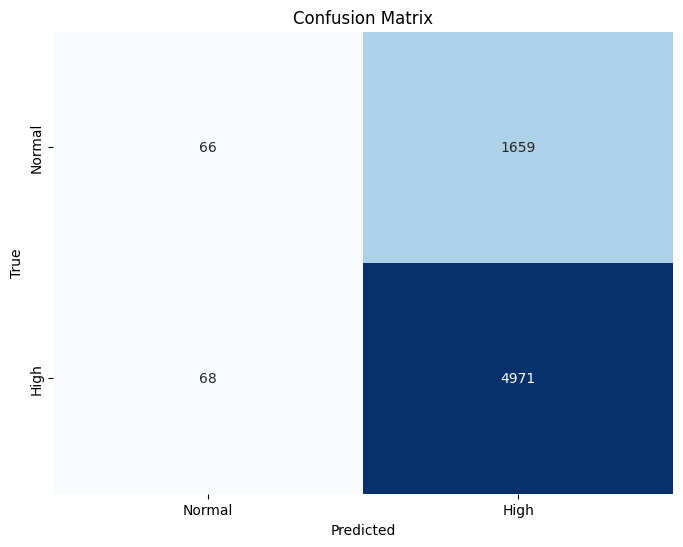

In [29]:
cf,accuracy,precision,recall,f1,m1_pred= testModel(model_lstm, x_test, y_test)
plot_confusion_matrix(cf, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

In [30]:
model_lstm.save(model_name+'.h5')

# Model Transformer

In [19]:
model_name="Transformer"
model_transformer = create_single_model_with_attention_block(num_classes,window_length, number_of_features,num_transformer_blocks=2,dense_layers=2)


In [20]:
import time
callb=addCallbacks(model_name)
start_time = time.time()
history = model_transformer.fit(x_train,y_train, epochs=epochs, validation_data=(x_val,y_val),batch_size = int(batch_size/8),callbacks=callb)
end_time = time.time()
durationt = end_time - start_time
print(durationt)

Epoch 1/150


I0000 00:00:1714996498.708310      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714996498.738258      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714996498.739432      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714996498.739938      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


193/194 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 0.5497 - recall: 0.7464

W0000 00:00:1714996577.063324      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


194/194 ━━━━━━━━━━━━━━━━━━━━ 111s 438ms/step - loss: 0.5494 - recall: 0.7466 - val_loss: 2.6277 - val_recall: 0.1235 - learning_rate: 0.0010
Epoch 2/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 61s 317ms/step - loss: 0.4914 - recall: 0.7852 - val_loss: 1.5797 - val_recall: 0.2862 - learning_rate: 0.0010
Epoch 3/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 61s 317ms/step - loss: 0.4823 - recall: 0.7892 - val_loss: 1.0365 - val_recall: 0.3290 - learning_rate: 0.0010
Epoch 4/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 61s 317ms/step - loss: 0.4781 - recall: 0.7852 - val_loss: 0.8920 - val_recall: 0.5480 - learning_rate: 0.0010
Epoch 5/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 62s 317ms/step - loss: 0.4702 - recall: 0.7892 - val_loss: 0.8305 - val_recall: 0.6321 - learning_rate: 0.0010
Epoch 6/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 62s 317ms/step - loss: 0.4549 - recall: 0.7932 - val_loss: 0.8668 - val_recall: 0.6529 - learning_rate: 0.0010
Epoch 7/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 62s 318ms/step - loss: 0.4473 - recall: 0.7942 - val_loss:

212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
Accuracy: 0.7415730337078652
Precision: 0.6721914500995256
Recall: 0.7415730337078652
F1 Score: 0.6563023949088768
              precision    recall  f1-score   support

           0       0.44      0.05      0.09      1725
           1       0.75      0.98      0.85      5039

    accuracy                           0.74      6764
   macro avg       0.60      0.51      0.47      6764
weighted avg       0.67      0.74      0.66      6764

Confusion Matrix:
 [[  89 1636]
 [ 112 4927]]
Row appended to 'results.csv' successfully.


/tmp/ipykernel_35/3030835386.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


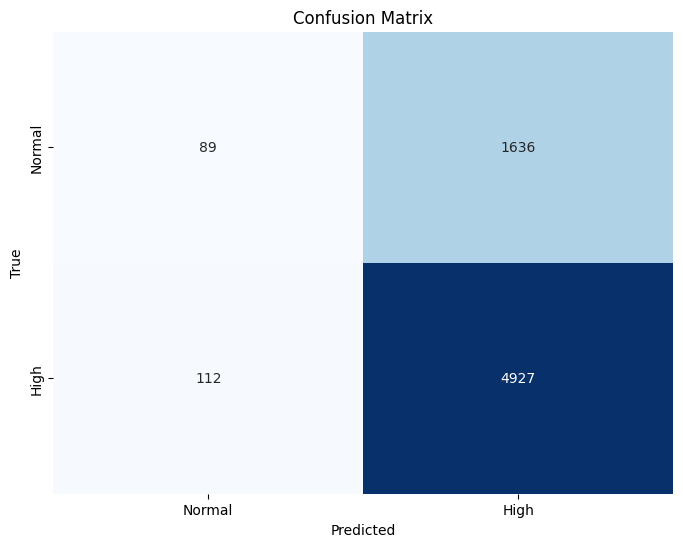

In [21]:
cf,accuracy,precision,recall,f1,m2_pred= testModel(model_transformer, x_test, y_test)
plot_confusion_matrix(cf, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

In [22]:
model_transformer.save(model_name+'.h5')

ValueError: Unable to synchronously create dataset (name already exists)

# Model HART

In [23]:
model_name="HART 8"

optimizer = tf.keras.optimizers.Adam(0.001)

model_HART = HART((window_length,num_features),num_classes)  #((window,features),num classes)
model_HART.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["recall"],
)

In [24]:
import time
callb=addCallbacks(model_name)
start_time = time.time()
history = model_HART.fit(x_train,y_train, epochs=epochs, validation_data=(x_val,y_val),batch_size = batch_size//8,callbacks=callb)
end_time = time.time()
durationt = end_time - start_time
print(durationt)

Epoch 1/150
  3/194 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.7859 - recall: 0.4336    

W0000 00:00:1714997859.895206      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997859.896498      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997859.897711      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997859.898914      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997859.900253      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997859.901689      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.5611 - recall: 0.7395

W0000 00:00:1714997919.550140      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997919.551535      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997919.552714      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997919.553914      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997919.555137      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714997919.556416      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


194/194 ━━━━━━━━━━━━━━━━━━━━ 149s 348ms/step - loss: 0.5610 - recall: 0.7396 - val_loss: 3.7206 - val_recall: 0.1317 - learning_rate: 0.0010
Epoch 2/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5049 - recall: 0.7778 - val_loss: 3.6391 - val_recall: 0.1237 - learning_rate: 0.0010
Epoch 3/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.4969 - recall: 0.7846 - val_loss: 3.4419 - val_recall: 0.1324 - learning_rate: 0.0010
Epoch 4/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.4931 - recall: 0.7863 - val_loss: 2.7617 - val_recall: 0.1358 - learning_rate: 0.0010
Epoch 5/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.4865 - recall: 0.7884 - val_loss: 2.0445 - val_recall: 0.1984 - learning_rate: 0.0010
Epoch 6/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.4838 - recall: 0.7892 - val_loss: 1.8248 - val_recall: 0.2462 - learning_rate: 0.0010
Epoch 7/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.4737 - recall: 0.7931 - val_loss: 1.5236 - va

212/212 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step
Accuracy: 0.6626256652868125
Precision: 0.6561261463011844
Recall: 0.6626256652868125
F1 Score: 0.6592475979343114
              precision    recall  f1-score   support

           0       0.33      0.31      0.32      1725
           1       0.77      0.78      0.78      5039

    accuracy                           0.66      6764
   macro avg       0.55      0.55      0.55      6764
weighted avg       0.66      0.66      0.66      6764

Confusion Matrix:
 [[ 534 1191]
 [1091 3948]]
Row appended to 'results.csv' successfully.


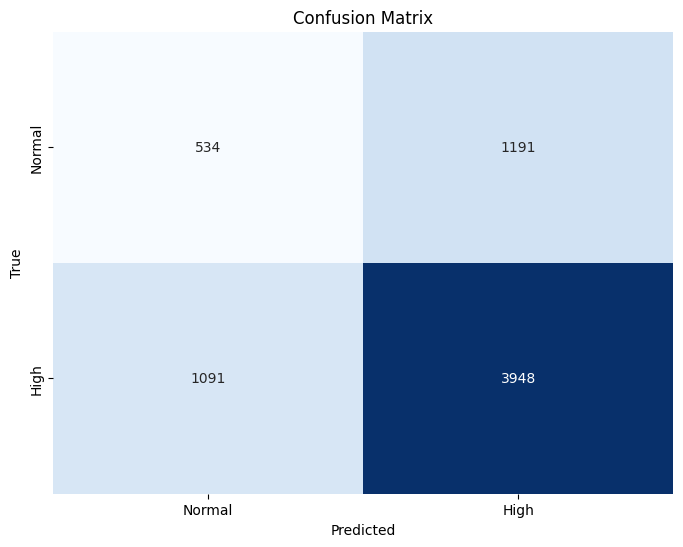

In [25]:
cf,accuracy,precision,recall,f1,m3_pred= testModel(model_HART, x_test, y_test)
plot_confusion_matrix(cf, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

In [26]:
model_HART.save(model_name+'.h5')

ValueError: Unable to synchronously create dataset (name already exists)

# Hard Voting

Accuracy: 0.7434949733885275
Precision: 0.6801058010493602
Recall: 0.7434949733885275
F1 Score: 0.6569756582438145
              precision    recall  f1-score   support

           0       0.47      0.05      0.09      1725
           1       0.75      0.98      0.85      5039

    accuracy                           0.74      6764
   macro avg       0.61      0.52      0.47      6764
weighted avg       0.68      0.74      0.66      6764

Confusion Matrix:
 [[  87 1638]
 [  97 4942]]
Row appended to 'results.csv' successfully.


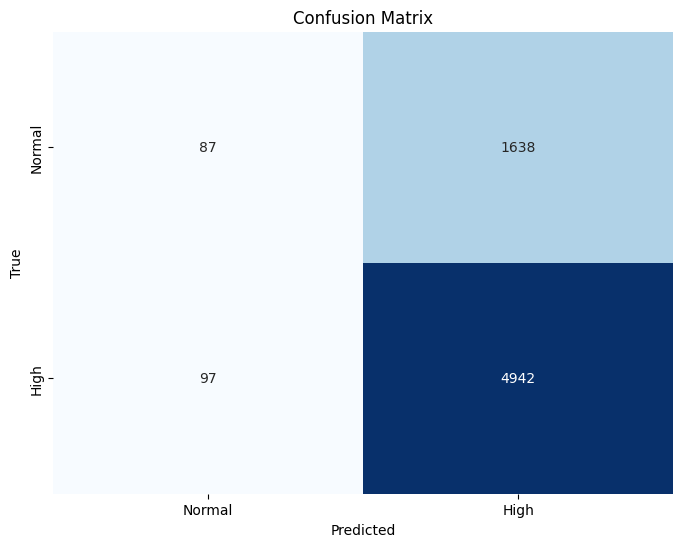

In [50]:
model_name="Hard Voting"
final_predictions = hard_voting(m1_pred, m2_pred, m3_pred)
conf_matrix, accuracy, precision, recall, f1=evaluate_predictions_ensemble(final_predictions, x_test, y_test)
plot_confusion_matrix(conf_matrix, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

# Soft Voting

Accuracy: 0.7405381431105854
Precision: 0.6789145573370896
Recall: 0.7405381431105854
F1 Score: 0.6688210064100713
              precision    recall  f1-score   support

           0       0.46      0.09      0.15      1725
           1       0.76      0.96      0.85      5039

    accuracy                           0.74      6764
   macro avg       0.61      0.53      0.50      6764
weighted avg       0.68      0.74      0.67      6764

Confusion Matrix:
 [[ 153 1572]
 [ 183 4856]]
Row appended to 'results.csv' successfully.


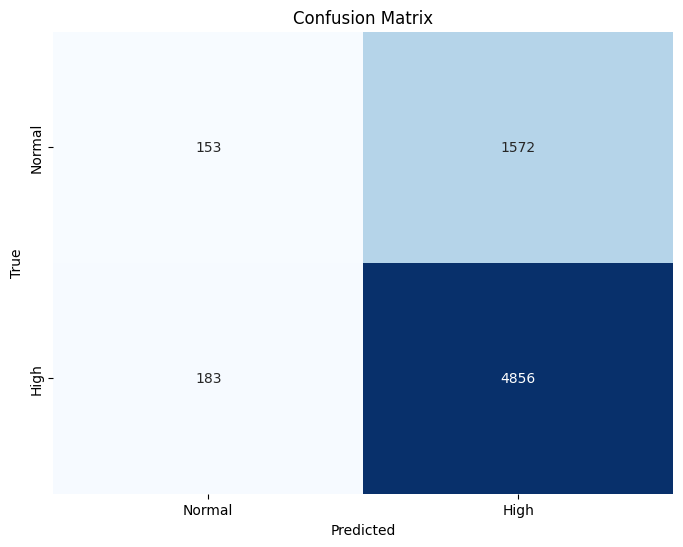

In [47]:
model_name="Soft Voting"
final_predictions = soft_voting(m1_pred, m2_pred, m3_pred)
conf_matrix, accuracy, precision, recall, f1=evaluate_predictions_ensemble(final_predictions, x_test, y_test)
plot_confusion_matrix(conf_matrix, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

# Weighted Voting

In [ ]:
# [[0.2, 0.3, 0.5],
#  [0.2, 0.5, 0.3],
#  [0.3, 0.2, 0.5],
#  [0.3, 0.5, 0.2],
#  [0.5, 0.2, 0.3],
#  [0.5, 0.3, 0.2]]
# m1=LSTM
# m2=Transformer
# m3=HART

Accuracy: 0.7486694263749261
Precision: 0.7135703325067132
Recall: 0.7486694263749261
F1 Score: 0.6567326414449325
              precision    recall  f1-score   support

           0       0.60      0.04      0.08      1725
           1       0.75      0.99      0.85      5039

    accuracy                           0.75      6764
   macro avg       0.68      0.52      0.47      6764
weighted avg       0.71      0.75      0.66      6764

Confusion Matrix:
 [[  73 1652]
 [  48 4991]]
Row appended to 'results.csv' successfully.


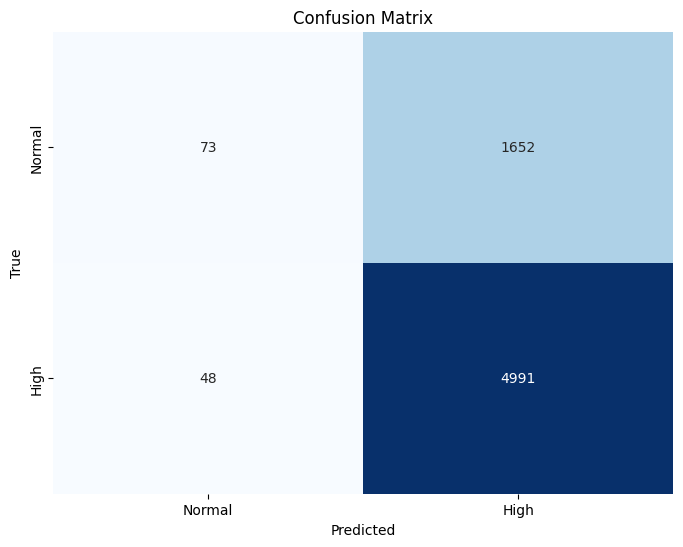

In [51]:
# LSTM Transformer HART
model_name="Weighted Voting 0.5,0,3,0.2"
weights=[0.5,0.3,0.2]
w_predictions = weighted_voting(m1_pred, m2_pred, m3_pred,weights)
conf_matrix, accuracy, precision, recall, f1=evaluate_predictions_ensemble(w_predictions, x_test, y_test)
plot_confusion_matrix(conf_matrix, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

Accuracy: 0.7040212891780012
Precision: 0.6543523899512635
Recall: 0.7040212891780012
F1 Score: 0.6692598664528842
              precision    recall  f1-score   support

           0       0.35      0.18      0.24      1725
           1       0.76      0.88      0.82      5039

    accuracy                           0.70      6764
   macro avg       0.55      0.53      0.53      6764
weighted avg       0.65      0.70      0.67      6764

Confusion Matrix:
 [[ 316 1409]
 [ 593 4446]]
Row appended to 'results.csv' successfully.


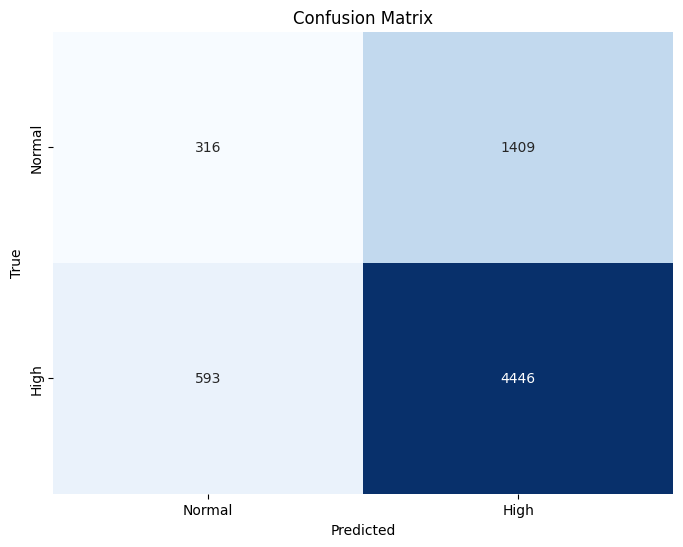

In [39]:
#  HART Transformer LSTM
model_name="Weighted Voting 0.2, 0.3, 0.5"
weights=[0.2, 0.3, 0.5]
w_predictions = weighted_voting(m1_pred, m2_pred, m3_pred,weights)
conf_matrix, accuracy, precision, recall, f1=evaluate_predictions_ensemble(w_predictions, x_test, y_test)
plot_confusion_matrix(conf_matrix, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

Accuracy: 0.7429036073329391
Precision: 0.6851733243871322
Recall: 0.7429036073329391
F1 Score: 0.6703141403403089
              precision    recall  f1-score   support

           0       0.48      0.09      0.15      1725
           1       0.76      0.97      0.85      5039

    accuracy                           0.74      6764
   macro avg       0.62      0.53      0.50      6764
weighted avg       0.69      0.74      0.67      6764

Confusion Matrix:
 [[ 153 1572]
 [ 167 4872]]
Row appended to 'results.csv' successfully.


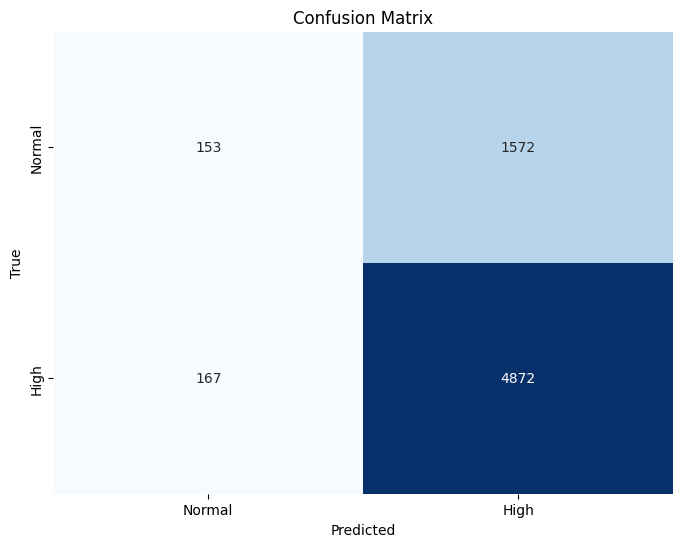

In [40]:
# LSTM HART Transformer
model_name="Weighted Voting 0.5, 0.2, 0.3"
weights=[0.5, 0.2, 0.3]
w_predictions = weiLSTghted_voting(m1_pred, m2_pred, m3_pred,weights)
conf_matrix, accuracy, precision, recall, f1=evaluate_predictions_ensemble(w_predictions, x_test, y_test)
plot_confusion_matrix(conf_matrix, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

Accuracy: 0.7465996451803667
Precision: 0.6960561304723523
Recall: 0.7465996451803667
F1 Score: 0.6596803739858738
              precision    recall  f1-score   support

           0       0.53      0.05      0.10      1725
           1       0.75      0.98      0.85      5039

    accuracy                           0.75      6764
   macro avg       0.64      0.52      0.47      6764
weighted avg       0.70      0.75      0.66      6764

Confusion Matrix:
 [[  91 1634]
 [  80 4959]]
Row appended to 'results.csv' successfully.


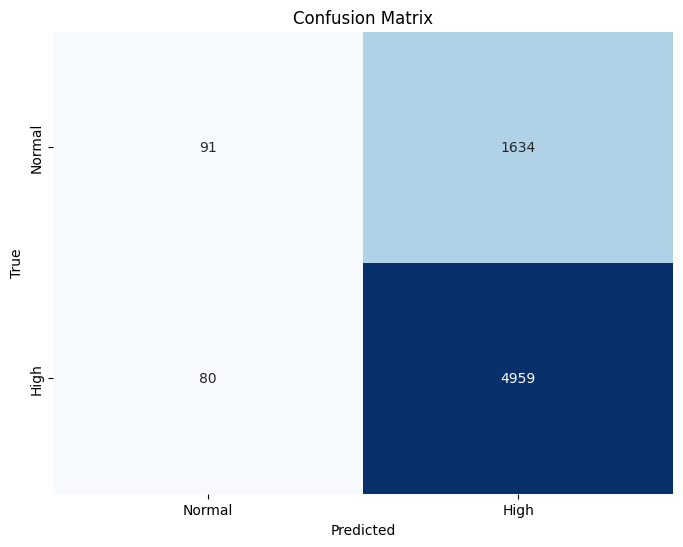

In [41]:
# Transformer LSTM HART
model_name="Weighted Voting 0.3, 0.5, 0.2"
weights=[0.3, 0.5, 0.2]
w_predictions = weighted_voting(m1_pred, m2_pred, m3_pred,weights)
conf_matrix, accuracy, precision, recall, f1=evaluate_predictions_ensemble(w_predictions, x_test, y_test)
plot_confusion_matrix(conf_matrix, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

Accuracy: 0.6985511531638084
Precision: 0.6552897902002224
Recall: 0.6985511531638084
F1 Score: 0.6696949759766713
              precision    recall  f1-score   support

           0       0.35      0.20      0.26      1725
           1       0.76      0.87      0.81      5039

    accuracy                           0.70      6764
   macro avg       0.55      0.54      0.53      6764
weighted avg       0.66      0.70      0.67      6764

Confusion Matrix:
 [[ 353 1372]
 [ 667 4372]]
Row appended to 'results.csv' successfully.


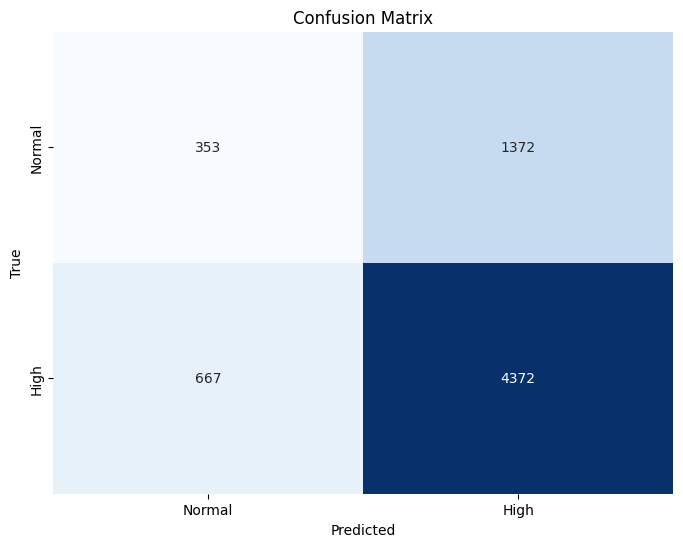

In [42]:
#  HART LSTM Transformer
model_name="Weighted Voting 0.3, 0.2, 0.5"
weights=[0.3, 0.2, 0.5]
w_predictions = weighted_voting(m1_pred, m2_pred, m3_pred,weights)
conf_matrix, accuracy, precision, recall, f1=evaluate_predictions_ensemble(w_predictions, x_test, y_test)
plot_confusion_matrix(conf_matrix, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

Accuracy: 0.7464518036664696
Precision: 0.6955893765564499
Recall: 0.7464518036664696
F1 Score: 0.6715766552500025
              precision    recall  f1-score   support

           0       0.52      0.09      0.15      1725
           1       0.76      0.97      0.85      5039

    accuracy                           0.75      6764
   macro avg       0.64      0.53      0.50      6764
weighted avg       0.70      0.75      0.67      6764

Confusion Matrix:
 [[ 148 1577]
 [ 138 4901]]
Row appended to 'results.csv' successfully.


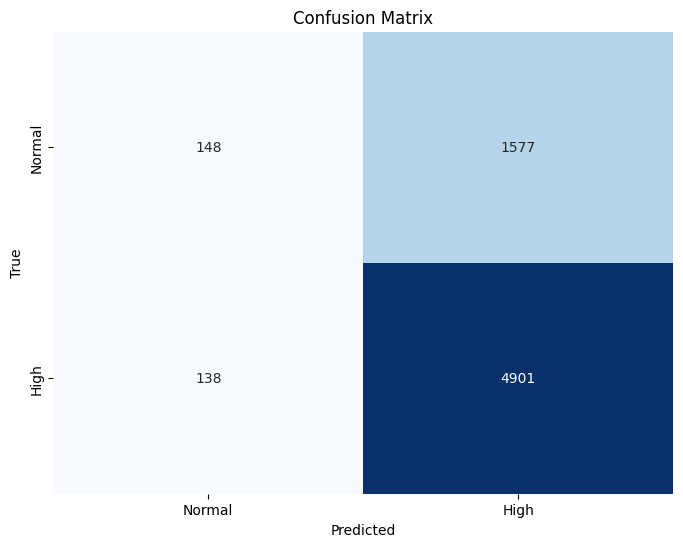

In [43]:
#  Transformer HART LSTM
model_name="Weighted Voting 0.2, 0.5, 0.3"
weights=[0.2, 0.5, 0.3]
w_predictions = weighted_voting(m1_pred, m2_pred, m3_pred,weights)
conf_matrix, accuracy, precision, recall, f1=evaluate_predictions_ensemble(w_predictions, x_test, y_test)
plot_confusion_matrix(conf_matrix, save_path='confusion_matrix_'+model_name+'.png',class_names=class_names2)
append_to_csv("results.csv", model_name, accuracy,precision,recall,f1)

In [52]:
import zipfile
import os

def zip_directory(directory_path, zip_path):
    # Create a ZipFile object
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Iterate over all the files in the directory
        for root, _, files in os.walk(directory_path):
            for file in files:
                # Add each file to the zip file
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, directory_path))

# Example usage
directory_path = "/kaggle/working/Logs"
zip_path = "/kaggle/working/late_logs.zip"
zip_directory(directory_path, zip_path)
